## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

import numpy as np

from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01633652 0.         0.04168389 0.94197959]


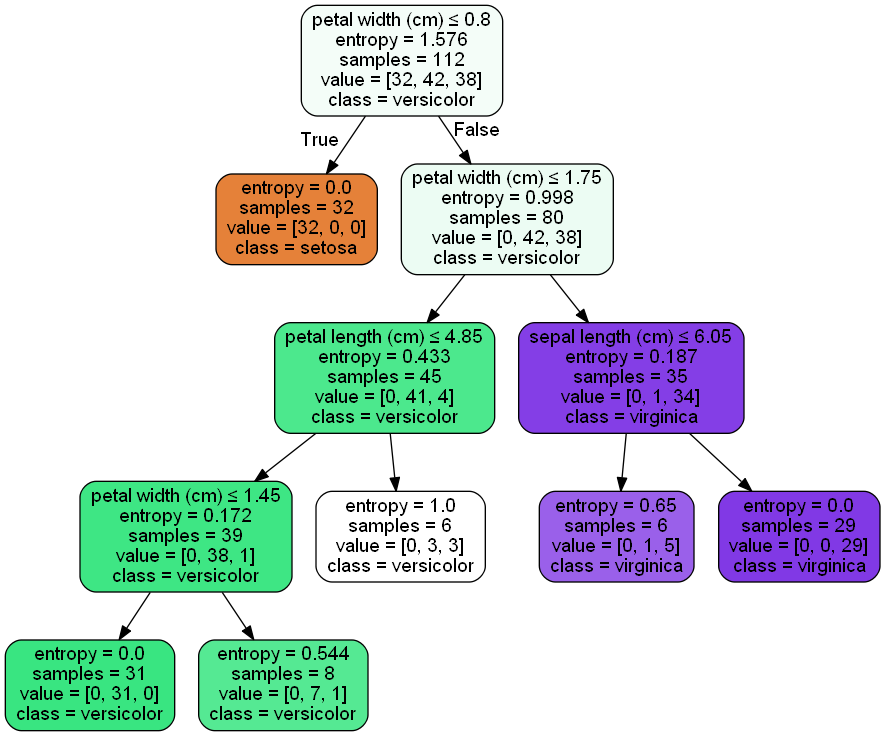

In [2]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# Decision Tree (Classifier) 參數調整
# - criterion('gini' | 'entropy') : 預設為 gini
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=2, min_samples_leaf=6)


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, \
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_pdf('iris.pdf')
Image(graph.create_png())

## Q1. 調整 DecisionTreeClassifier(...) 中的參數值
### 對 accuracy_score ==> 沒有差異
** accuracy_score = 分类准确率分数是指所有分类正确的百分比。
   分类准确率这一衡量分类器的标准比较容易理解，但是它不能告诉你响应值的潜在分布，并且它也不能告诉你分类器犯错的类型。
    
### 對 feature_importances_ ==> 有影響
*** feature_importances_ = 列出每一維度的重要性

## Q2-1. BOSTON ==> DecisionTreeClassifier

Acuuracy:  0.07086614173228346
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.16048257 0.         0.091611   0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.74790643]


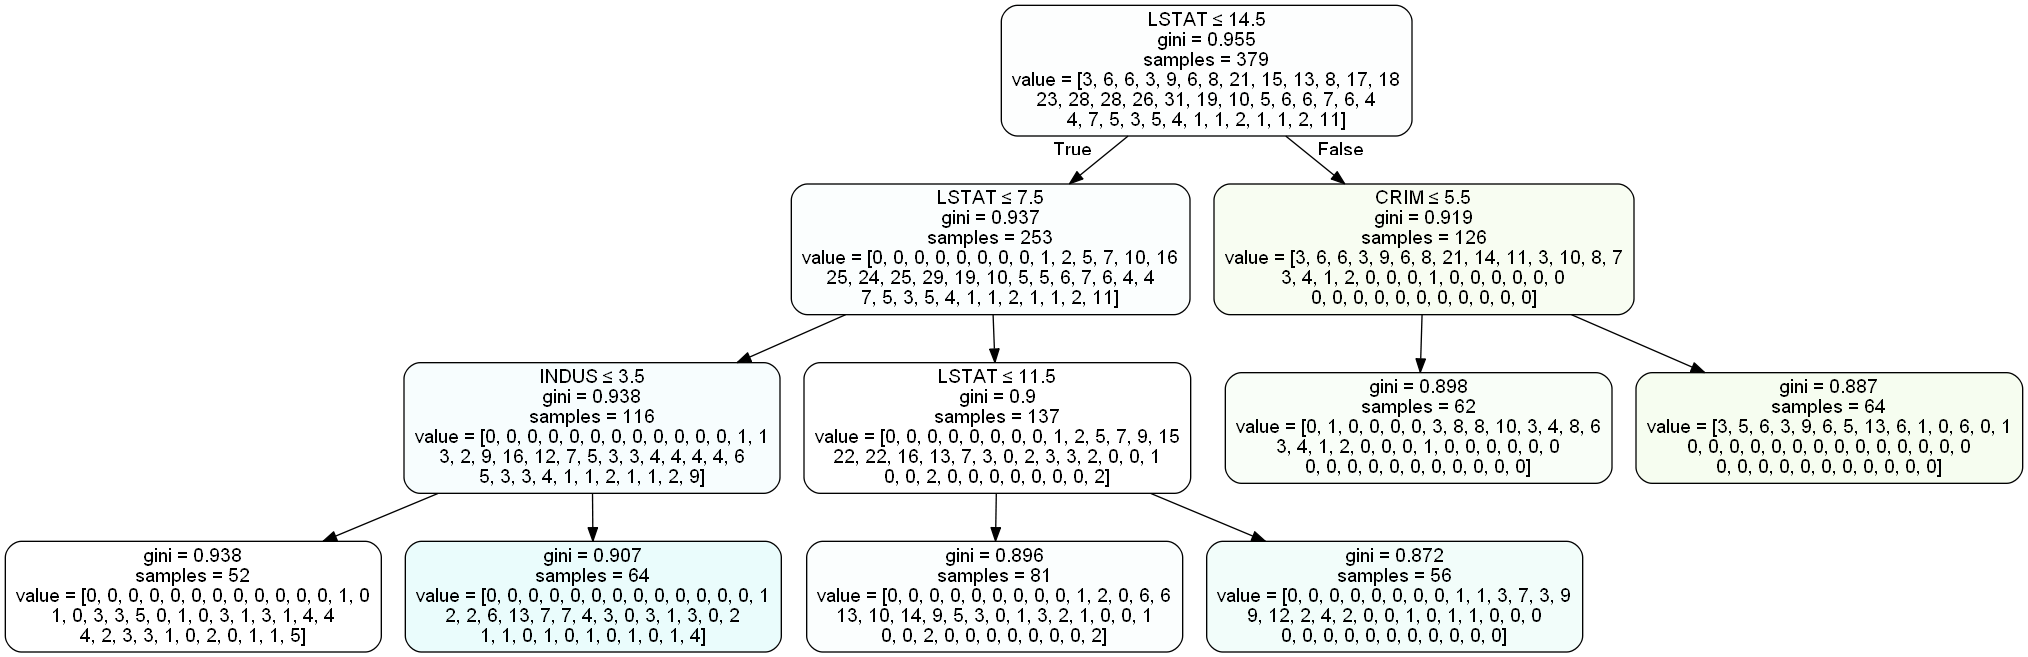

In [3]:
# boston dataset 中的值為 float , 訓練時皆須轉 type 為 int

boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=50)

clf.fit(x_train.astype('int'), y_train.astype('int'))
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test.astype('int'), y_pred)
print("Acuuracy: ", acc)

print(boston.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=boston.feature_names, \
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Q2-1. BOSTON ==> DecisionTreeRegressor

MSE:  36.33094235007445
RMSE:  6.027515437564175
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.04387505 0.         0.         0.         0.         0.
 0.02464288 0.         0.         0.         0.         0.
 0.93148207]


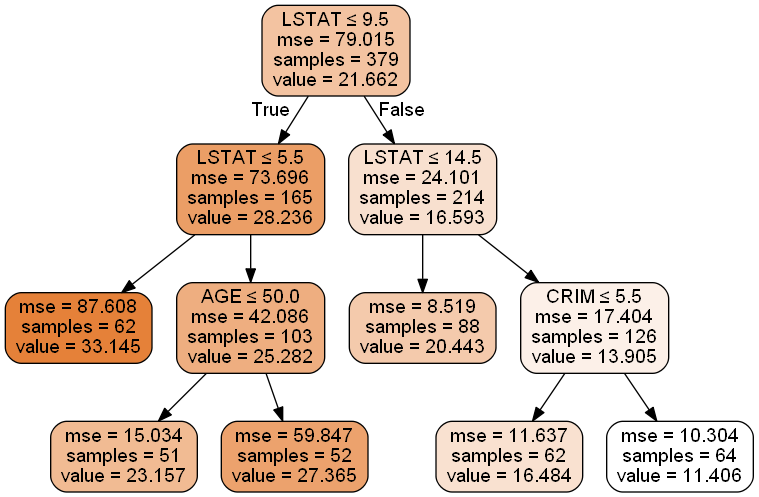

In [4]:
# boston dataset 中的值為 float , 訓練時皆須轉 type 為 int

boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# - criterion('mse'|'mae') : 預設為 mse
reg = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=50)

reg.fit(x_train.astype('int'), y_train.astype('int'))
y_pred = reg.predict(x_test)

# accuracy_score 精度分数仅用于分类问题。对于回归问题，只能可以使用:R2评分，MSE(平均平方误差)，RMSE(均方根误差)。
# ==> 所以此部份回歸問題的評分要改用 MSE 來計算
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

print(boston.feature_names)
print("Feature importance: ", reg.feature_importances_)

dot_data = tree.export_graphviz(reg, out_file=None, feature_names=boston.feature_names, \
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Q2-2. WINE ==> DecisionTreeClassifier

Acuuracy:  0.8888888888888888
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.01364138 0.03076567 0.         0.         0.         0.
 0.04296585 0.         0.         0.38107601 0.         0.12444169
 0.4071094 ]


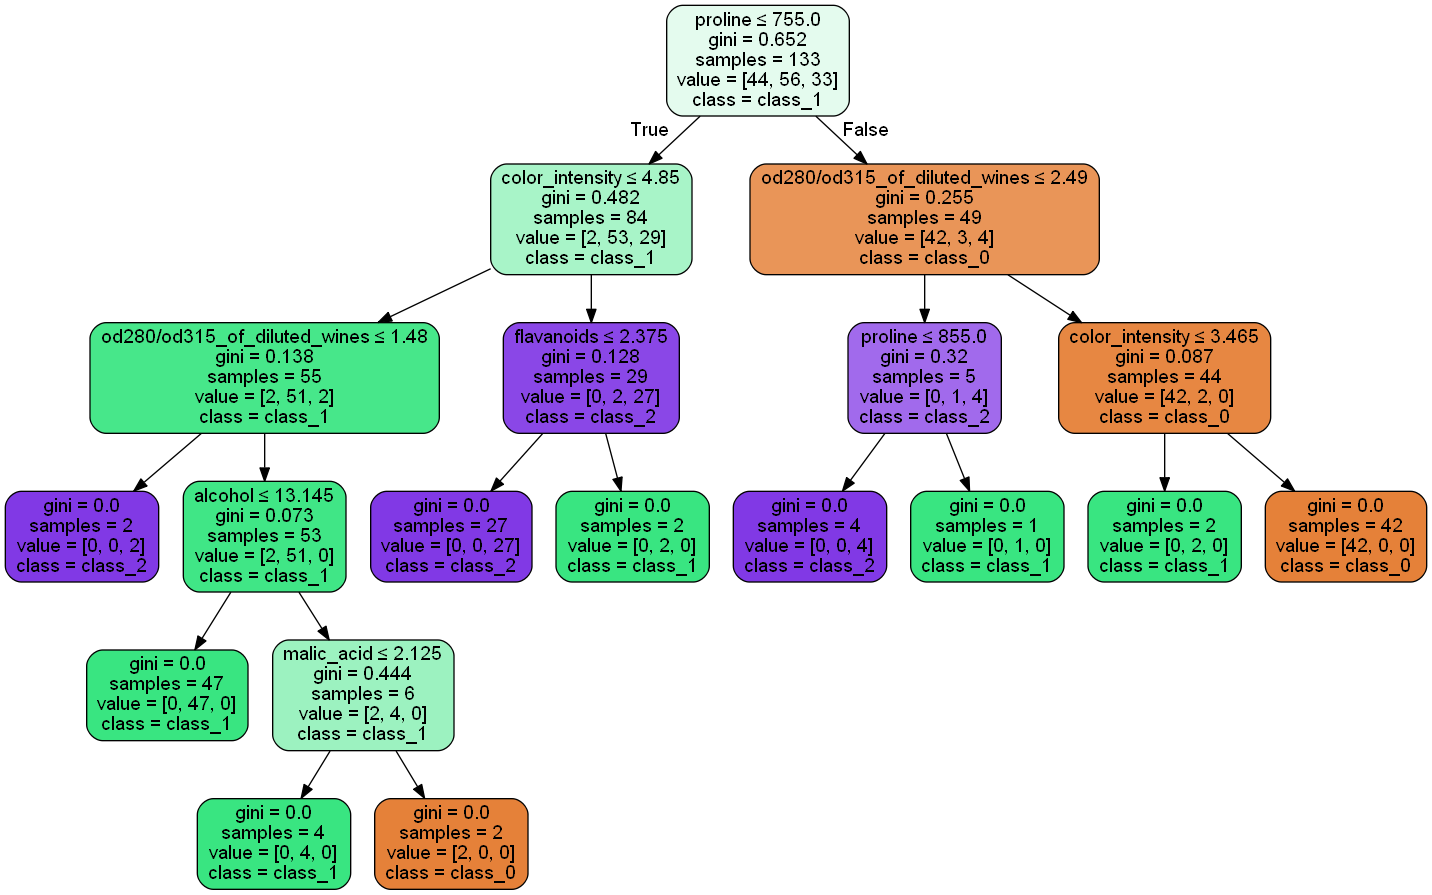

In [5]:
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(wine.feature_names)
print("Feature importance: ", clf.feature_importances_)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names, \
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Q2-2. WINE ==> DecisionTreeRegressor

MSE:  0.022222222222222223
RMSE:  0.14907119849998599
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.         0.         0.         0.00299987 0.         0.
 0.61367513 0.00985672 0.         0.1214791  0.         0.
 0.25198917]


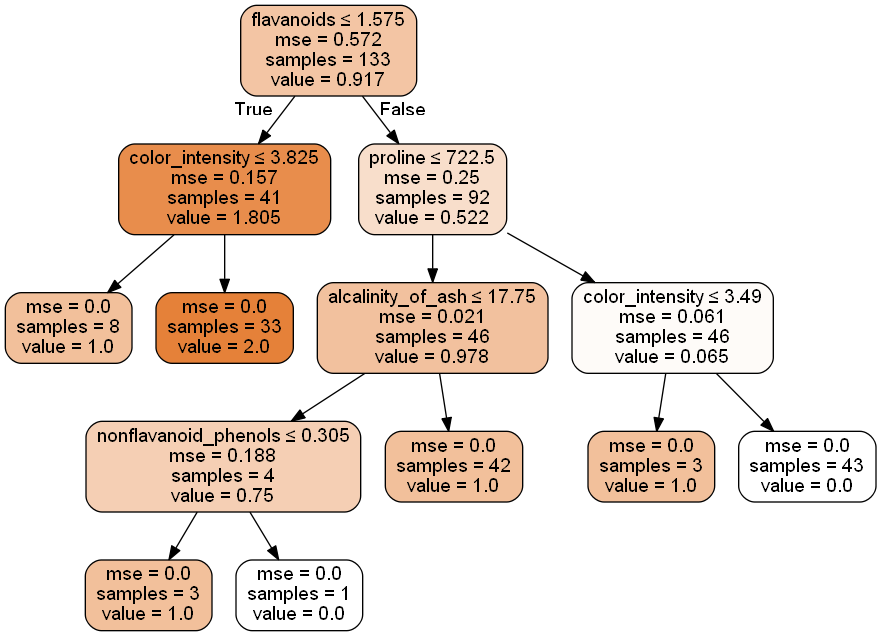

In [6]:
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

reg = DecisionTreeRegressor()

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# accuracy_score 精度分数仅用于分类问题。对于回归问题，只能可以使用:R2评分，MSE(平均平方误差)，RMSE(均方根误差)。
# ==> 所以此部份回歸問題的評分要改用 MSE 來計算
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

print(wine.feature_names)
print("Feature importance: ", reg.feature_importances_)

dot_data = tree.export_graphviz(reg, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names, \
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())